# Importing The Required Libraries
Pandas is used for managing the dataframes & Logistic Regression from sklearn is used to classify the Tumor cells that whether they are Benign or Malignant. You may need to install libraries first if these are not installed. These can be simply installed by going into terminal and **pip install pandas** or **pip install sklearn**

In [118]:
#importing Required Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [119]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# Loading Data into Dataframe & Splitting Features/Target

In [120]:
#Loading the data from a csv file into a dataframe
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/cancer.csv"
df = pd.read_csv(URL)
df.sample(5)

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,diagnosis
549,10.820,68.89,361.6,0.08192,0.06602,0.01548,0.1976,Benign
259,15.530,103.70,744.9,0.10630,0.16390,0.17510,0.2091,Malignant
310,11.700,74.33,418.7,0.08814,0.05253,0.01583,0.1936,Benign
463,11.600,73.88,412.7,0.08508,0.05855,0.03367,0.1516,Benign
101,6.981,43.79,143.5,0.11700,0.07568,0.00000,0.1930,Benign


<Axes: xlabel='diagnosis'>

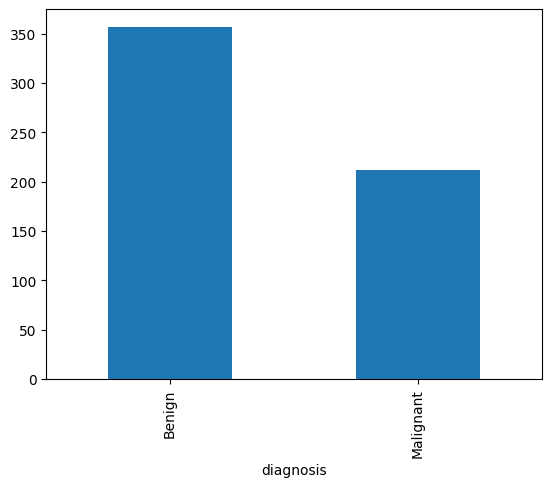

In [121]:
#plotting the types & count of diagnosis
df.diagnosis.value_counts().plot.bar()

In [122]:
#Splitting dataframe into features & target X = Features & y= Target
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Building and Training Classifier

In [123]:
#creating a logistic regression classifier with 200 maximum iterations
classifier=LogisticRegression(max_iter=200)

In [124]:
#fitting the features and target into the classifier
classifier.fit(X,y)

LogisticRegression(max_iter=200)

# Evaluating the Classifier

In [125]:
#evaluating the classifier
print("Classifier Accuracy:", classifier.score(X, y))

Classifier Accuracy: 0.8998242530755711


In [126]:
classifier.predict([[13.45,86.6,555.1,0.1022,0.08165,0.03974,0.1638]])

array(['Benign'], dtype=object)

In [127]:
classifier.predict([[13.0,120.6,1200,0.0847,0.07864,0.0869,0.1812]])

array(['Malignant'], dtype=object)

# Visualization of Project

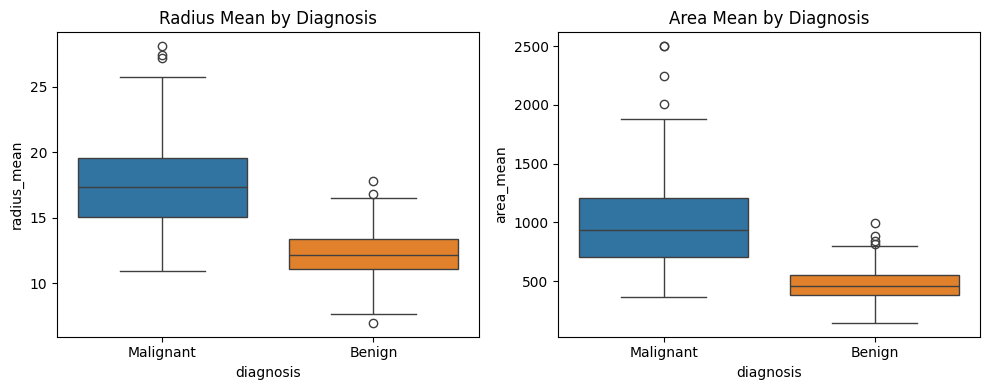

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=y, y=X['radius_mean'], hue=y)
plt.title("Radius Mean by Diagnosis")
plt.subplot(1, 2, 2)
sns.boxplot(x=y, y=X['area_mean'], hue=y)
plt.title("Area Mean by Diagnosis")
plt.tight_layout()
#plt.savefig("box_plots.png")  # Save as PNG
plt.show()

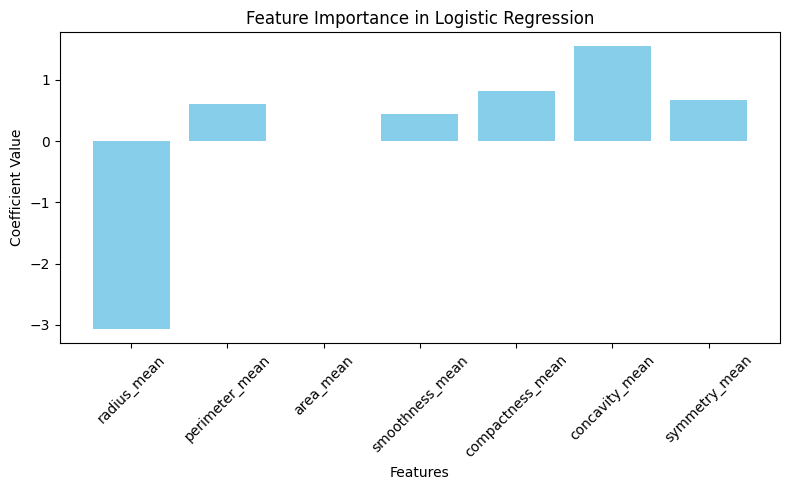

In [129]:
#import matplotlib.pyplot as plt

coef = classifier.coef_[0]
features = X.columns

plt.figure(figsize=(8, 5))
plt.bar(features, coef, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in Logistic Regression")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()

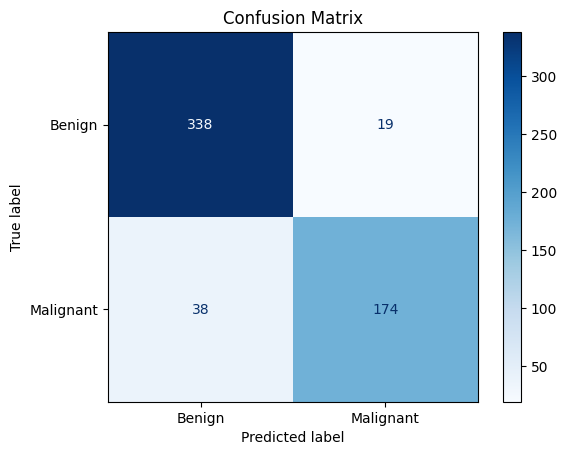

In [130]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = classifier.predict(X)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
#plt.savefig("confusion_matrix.png")
plt.show()

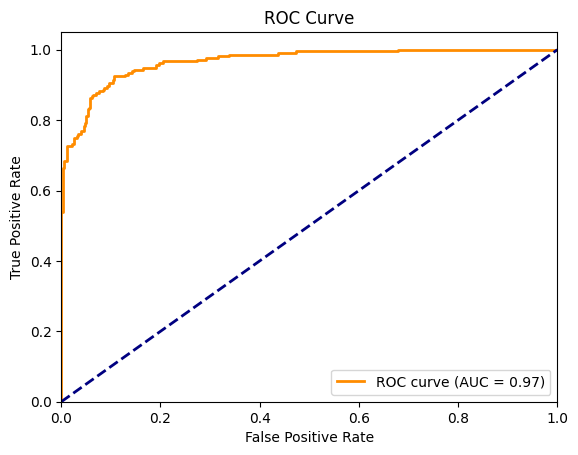

In [131]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_prob = classifier.predict_proba(X)[:, 1]
fpr, tpr, _ = roc_curve(y_encoded, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
#plt.savefig("roc_curve.png")
plt.show()

In [132]:
from sklearn.metrics import classification_report

# Predict on the training data
y_pred = classifier.predict(X)

# Generate and print classification report
report = classification_report(y, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Benign       0.90      0.95      0.92       357
   Malignant       0.90      0.82      0.86       212

    accuracy                           0.90       569
   macro avg       0.90      0.88      0.89       569
weighted avg       0.90      0.90      0.90       569

